In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport

In [29]:
df= pd.read_csv('aviones_arreglado.csv')

In [80]:
df.head()

fecha      hora                operador           tipo_de_avion  \
0  1908-9-17  17:18:00    Military - U.S. Army        Wright Flyer III   
1  1909-9-07       NaN                     NaN          Wright Byplane   
2  1912-7-12  06:30:00    Military - U.S. Navy               Dirigible   
3  1913-8-06       NaN                 Private        Curtiss seaplane   
4  1913-9-09  18:30:00  Military - German Navy  Zeppelin L-1 (airship)   

                                 ruta  pasajeros_a_bordo  personal_a_bordo  \
0                 Fort Myer, Virginia                1.0               1.0   
1             Juvisy-sur-Orge, France                0.0               1.0   
2           Atlantic City, New Jersey                0.0               5.0   
3  Victoria, British Columbia, Canada                0.0               1.0   
4                  Over the North Sea                NaN               NaN   

   total_a_bordo  pasajeros_fallecidos  personal_fallecido  ground  \
0            2.0                   1.0                 0.0     0.0   
1            1.0                   0.0                 0.0     0.0   
2            5.0                   0.0                 5.0     0.0   
3            1.0                   0.0                 1.0     0.0   
4           20.0                   NaN                 NaN     0.0   

   total_fallecidos   año  dia  mes  \
0               1.0  1908   17    9   
1               1.0  1909    7    9   
2               5.0  1912   12    7   
3               1.0  1913    6    8   
4              14.0  1913    9    9   

                                             summary  
0  During a demonstration flight, a U.S. Army fly...  
1  Eugene Lefebvre was the first pilot to ever be...  
2  First U.S. dirigible Akron exploded just offsh...  
3  The first fatal airplane accident in Canada oc...  
4  The airship flew into a thunderstorm and encou...

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 5008 non-null   object 
 1   hora                  3504 non-null   object 
 2   operador              4998 non-null   object 
 3   tipo_de_avion         4995 non-null   object 
 4   ruta                  5003 non-null   object 
 5   pasajeros_a_bordo     4787 non-null   float64
 6   personal_a_bordo      4789 non-null   float64
 7   total_a_bordo         4991 non-null   float64
 8   pasajeros_fallecidos  4773 non-null   float64
 9   personal_fallecido    4773 non-null   float64
 10  ground                4964 non-null   float64
 11  total_fallecidos      5000 non-null   float64
 12  año                   5008 non-null   int64  
 13  dia                   5008 non-null   int64  
 14  mes                   5008 non-null   int64  
 15  summary              

## se visualizan la cantidad de accidentes que transcurren por hora

In [82]:
df['hora'] = pd.to_datetime(df['hora'])
# Ordenar el DataFrame por la columna "hora" en orden ascendente
df = df.sort_values('hora')

# Datos para el histograma
data = df['hora']

# Crear el histograma
fig = px.histogram(data, nbins=24, range_x=['00:00', '23:59'])

# Formatear las etiquetas del eje x
fig.update_layout(
    xaxis_tickformat='%H:%M'
)

# Personalizar el histograma (opcional)
fig.update_layout(
    title='Distribucion Local de accidentes',
    xaxis_title='Hora',
    yaxis_title='Frecuencia'
)

# Mostrar el histograma
fig.show()

## se visualizan la cantidad de accidentes por mes

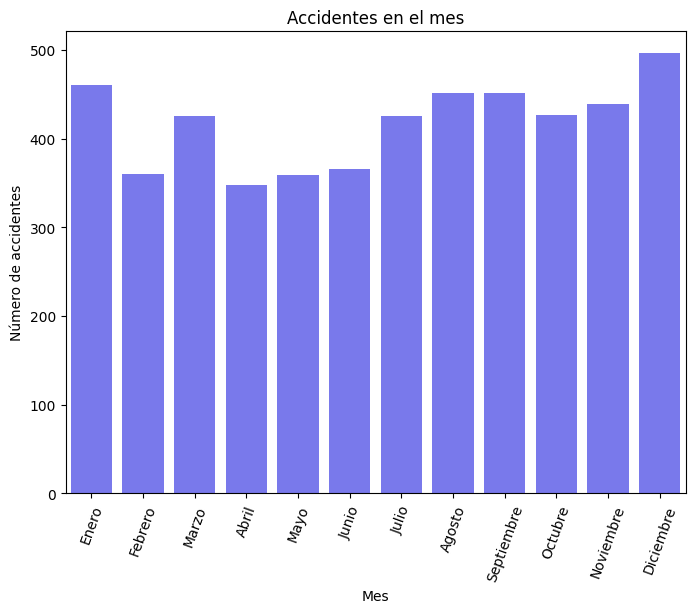

In [53]:
meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Reemplazar los números de mes por los nombres de mes en una nueva columna "mes_nombre"
df['mes_nombre'] = df['mes'].map(meses)

# Crear el gráfico de recuento por mes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='mes_nombre',color= 'b', alpha= 0.6 ,order=list(meses.values()))
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.title('Accidentes en el mes')
plt.xticks(rotation=70)
plt.show()

## indistintamente se visualiza que no importa cual sea el dia, las distribuciones son muy similares en cuanto accidentes

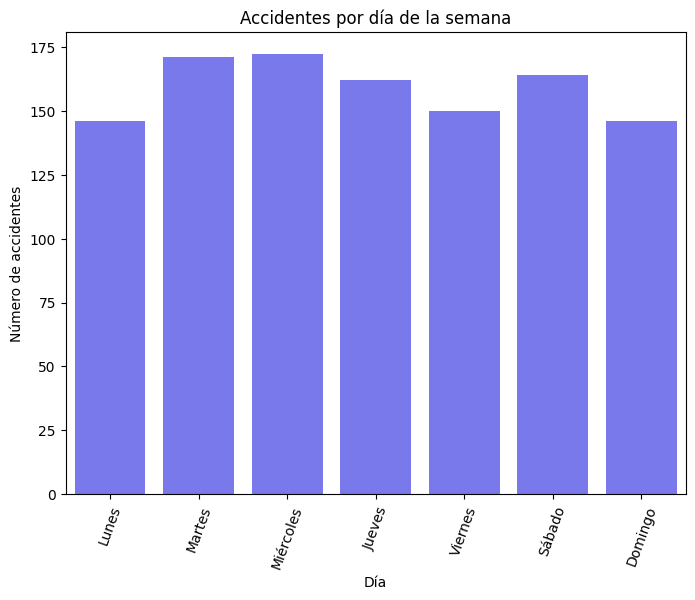

In [54]:
# Mapeo de números de día a nombres de día
dias = {
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado',
    7: 'Domingo'
}

# Reemplazar los números de día por los nombres de día en una nueva columna "dia_nombre"
df['dia_nombre'] = df['dia'].map(dias)

# Crear el gráfico de recuento por día
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='dia_nombre', color= 'b', alpha= 0.6 ,order=list(dias.values()))
plt.xlabel('Día')
plt.ylabel('Número de accidentes')
plt.title('Accidentes por día de la semana')
plt.xticks(rotation=70)
plt.show()

## se realiza un analisis de accidentes por año con distintas graficas para la comodidad del usuario

In [85]:
años = pd.Series(df.año.value_counts()).sort_index()
px.line(años, x= años.index, y= años.values, title='Accidentes por año', labels={'index': 'años', 'y': 'Numeros de accidentes'})

In [86]:
# Obtener el recuento de accidentes por año
años = pd.Series(df['año'].value_counts()).sort_index()

# Crear el gráfico de línea
fig = px.line(años, x=años.index, y=años.values, title='Accidentes por año', labels={'index': 'Años', 'y': 'Número de accidentes'})

# Agregar el histograma
fig.add_trace(px.histogram(df, x='año').data[0])

# Mostrar el gráfico
fig.show()

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Obtener el recuento de accidentes por año
años = pd.Series(df['año'].value_counts()).sort_index()

# Crear subplots personalizados
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Agregar el gráfico de línea
fig.add_trace(go.Scatter(x=años.index, y=años.values, mode='lines', name='Accidentes por año'), row=1, col=1)

# Agregar el histograma
fig.add_trace(go.Histogram(x=df['año'], name='Distribución de accidentes'), row=2, col=1)

# Configurar el diseño de los subplots
fig.update_layout(height=600, width=800, title_text='Accidentes por año')

# Mostrar el gráfico
fig.show()

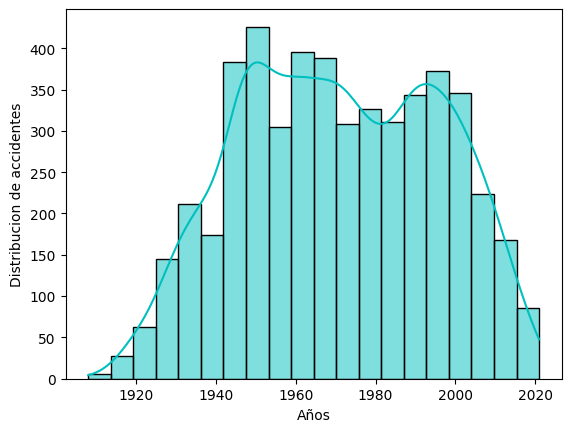

In [88]:
sns.histplot(data=df, x='año', bins=20, color='c', kde=True)
plt.xlabel('Años')
plt.ylabel('Distribucion de accidentes')
plt.show()

## desde aca se miran las distribucciones de accidentes por año

In [89]:
px.box(df, y='año',title='Distribucion de accidentes por año', width= 600, labels={'año': 'Año'})

## Aqui se mira la distribucion de muertes en tierra dejando un dato curioso visto a primera vista como un outlier, con la sorpresa que en realidad fue un atentado

In [92]:
px.box(df, y='ground', title='Distrubucion de numero de muertes en tierra', width=800, labels={'ground': 'numero de personas fallecidas'})

In [93]:
df[df.ground == 2750] # cuando te das cuenta de un atentado 

fecha                hora           operador     tipo_de_avion  \
4346  2001-9-11 2023-05-20 08:47:00  American Airlines  Boeing 767-223ER   
4347  2001-9-11 2023-05-20 09:03:00   United Air Lines  Boeing B-767-222   

                         ruta  pasajeros_a_bordo  personal_a_bordo  \
4346  New York City, New York               81.0              11.0   
4347  New York City, New York               56.0               9.0   

      total_a_bordo  pasajeros_fallecidos  personal_fallecido  ground  \
4346           92.0                  81.0                11.0  2750.0   
4347           65.0                  56.0                 9.0  2750.0   

      total_fallecidos   año  dia  mes  \
4346              92.0  2001   11    9   
4347              65.0  2001   11    9   

                                                summary  mes_nombre dia_nombre  
4346  The aircraft was hijacked shortly after it lef...  Septiembre        NaN  
4347  The aircraft was hijacked shortly after it lef...  Septiembre        NaN

## Top 10 accidentes por tipo de avion siendo el primero el gran Douglas DC-3 un avión que revolucionó el transporte de pasajeros en los 30 y 40 del siglo XX.

In [94]:
tipo_avion= pd.Series(df['tipo_de_avion'].value_counts())

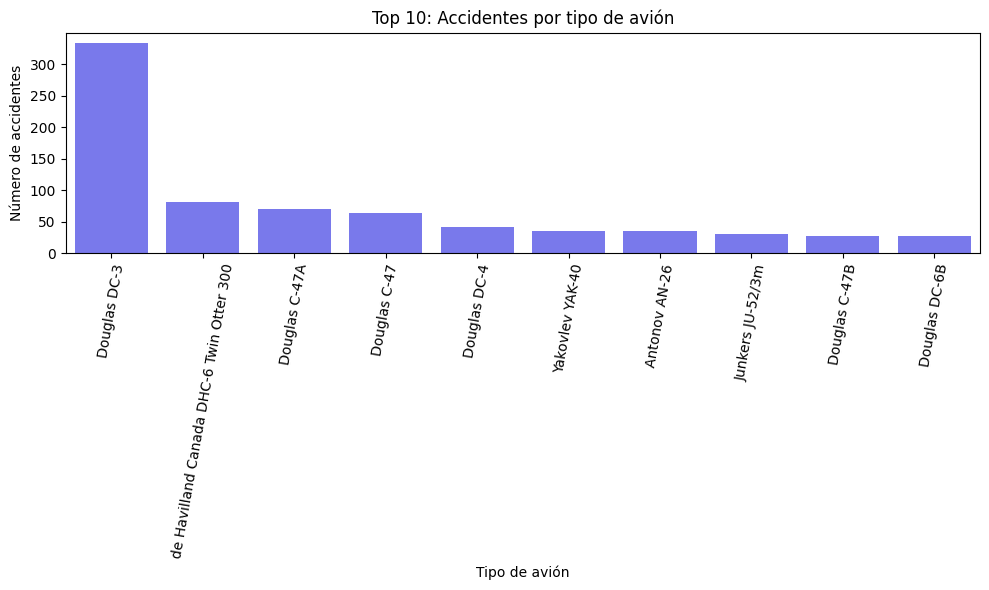

In [55]:
plt.figure(figsize=(10, 6))

# Obtener los 10 tipos de avión con mayor número de accidentes
top_10_tipos = df['tipo_de_avion'].value_counts().head(10)

# Gráfico de barras
ax = sns.barplot(x=top_10_tipos.index, y=top_10_tipos.values, color = 'b', alpha= 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Tipo de avión')
plt.ylabel('Número de accidentes')
plt.title('Top 10: Accidentes por tipo de avión')

plt.tight_layout()
plt.show()

## Top 10 accidentes por ubicacion

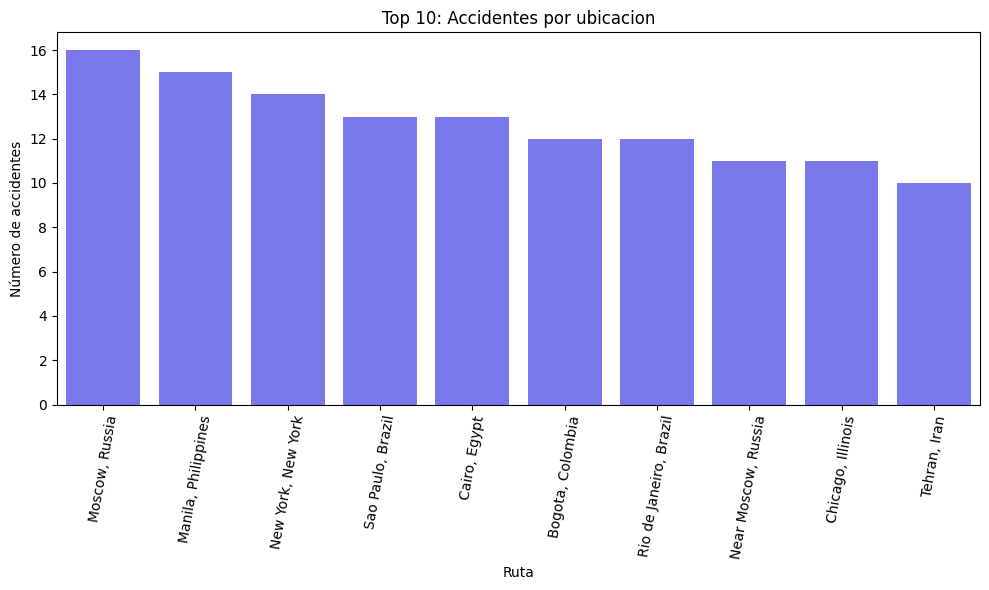

In [56]:
plt.figure(figsize=(10, 6))

# Obtener las 10 localizaciones con mayor número de accidentes
top_10_localizaciones = df['ruta'].value_counts().head(10)

# Gráfico de barras
ax = sns.barplot(x=top_10_localizaciones.index, y=top_10_localizaciones.values, color = 'b', alpha= 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Ruta')
plt.ylabel('Número de accidentes')
plt.title('Top 10: Accidentes por ubicacion')

plt.tight_layout()
plt.show()

## se miran los accidentes de aviones mas frecuentes por tipo de operador, se intuye que multiples causas fueron por tiempos de guerra pero no significa que tomen el primer lugar

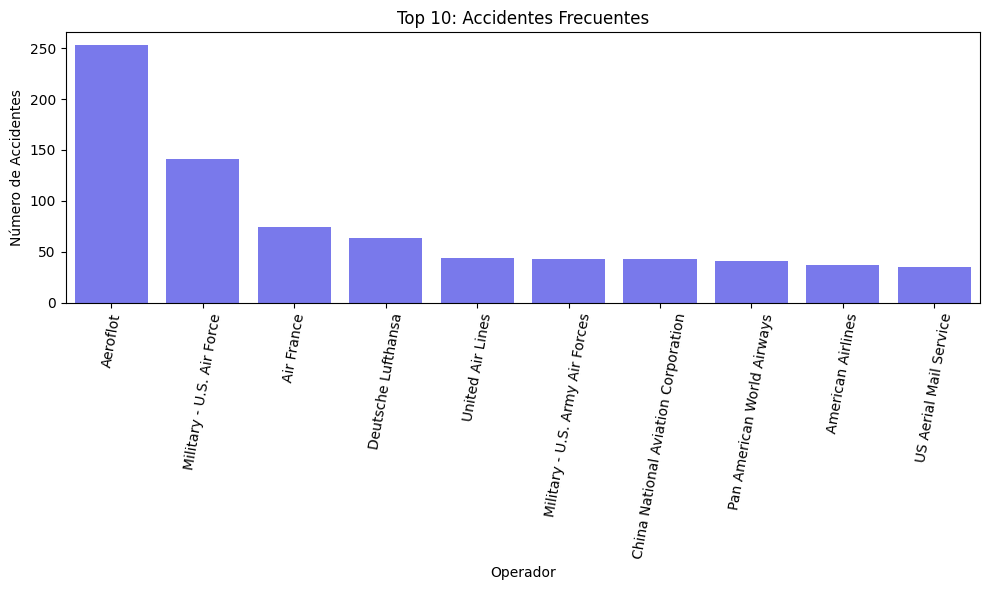

In [57]:
plt.figure(figsize=(10, 6))

# Obtener los 10 tipos de avión con mayor número de accidentes
top_10_tipos = df['operador'].value_counts().head(10)

# Gráfico de barras
ax = sns.barplot(x=top_10_tipos.index, y=top_10_tipos.values, color = 'b', alpha= 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Operador')
plt.ylabel('Número de Accidentes')
plt.title('Top 10: Accidentes Frecuentes')

plt.tight_layout()
plt.show()

## En esta sección, se presentan los 10 principales accidentes clasificados por causa. Dado que existen numerosos casos, no se consideró relevante mostrar cada uno de ellos, especialmente porque a partir del puesto 15, las causas comienzan a variar considerablemente, dificultando la identificación de un patrón claro. Para un análisis más profundo, se descartará esta columna, ya que no tiene sentido realizarlo en este momento dada la naturaleza y objetivo actual del estudio.

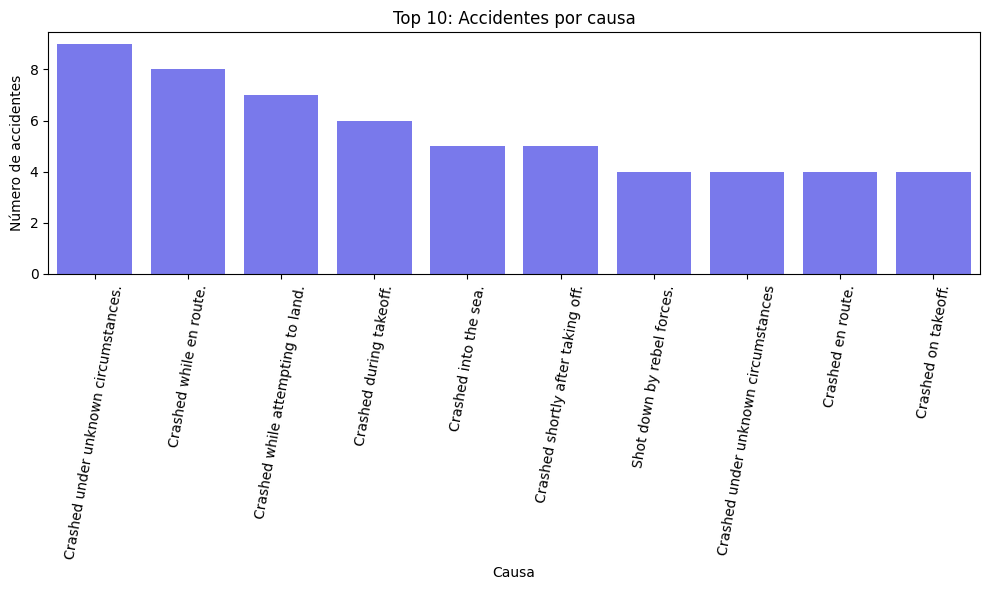

In [58]:
plt.figure(figsize=(10, 6))

# Las 10 causas con mayor número de accidentes
top_10_causas = df['summary'].value_counts().head(10)

# Gráfico de barras
sns.barplot(x=top_10_causas.index, y=top_10_causas.values, color= 'b', alpha= 0.6)
plt.xticks(rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Causa')
plt.ylabel('Número de accidentes')
plt.title('Top 10: Accidentes por causa')

plt.tight_layout()
plt.show()

## para finalizar se saca una estadistica de muertes por accidente graficadas 

In [19]:
import plotly.graph_objects as go

dt = df.groupby('año').agg({'total_fallecidos': 'sum', 'total_a_bordo': 'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=dt['año'], y=dt['total_a_bordo'], name='total_a_bordo'))
fig.add_trace(go.Scatter(x=dt['año'], y=dt['total_fallecidos'], name='total_fallecidos'))
fig.update_layout(title='Total Fallecimientos en avión por año',
                  xaxis_title='año',
                  yaxis_title='cantidad')

fig.show()


In [24]:
mortalidad = df.groupby(by=['año'])[['total_a_bordo','total_fallecidos']].sum().reset_index()
mortalidad['tasa'] = round((mortalidad.total_fallecidos/mortalidad.total_a_bordo)*100,2)
mortalidad['dif_tasa'] = round(mortalidad.tasa.pct_change() * 100,2)

In [25]:
px.line(mortalidad, x='año', y='dif_tasa',
        title='Variacion de tasa mortalidad anual', labels={'año': 'Año', 'y': 'Variacion tasa mortalidad(%)'})

# EXTRA

### en el caso que precise mas datos puede visitar la libreria ProfileReport

In [27]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]